### INTRODUCTION TO RASTERIO (PART 2)

In [1]:
import rasterio as rio

### Opening a dataset

In [16]:
with rio.open('./data/output_SRTMGL1.tif') as src:
    metadata = src.meta

    # print (f"{key}:{value}" for key, value in metadata.items())

# for key, value in metadata.items():
#     print(f"{key}:{value}")

src.width
src.height
src.crs
src.transform
src.bounds
src.count
src.driver
src.dtypes
src.nodata

-32768.0

### Visualizing Rasters

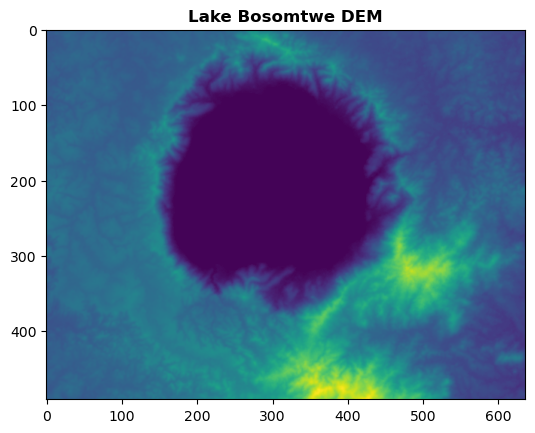

<Axes: title={'center': 'Lake Bosomtwe DEM'}>

In [20]:
from rasterio.plot import show

with rio.open('./data/output_SRTMGL1.tif') as src:
    band = src.read(1)

show(
    band,
    # contour = True
    title ="Lake Bosomtwe DEM"
    )

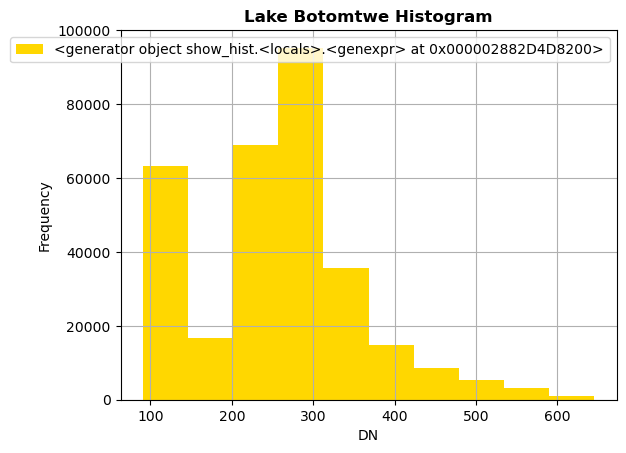

In [22]:
from rasterio.plot import show_hist

with rio.open('./data/output_SRTMGL1.tif') as src:
    band = src.read(1)

show_hist(band,
          title="Lake Botomtwe Histogram")

### Transforming between Pixel coordinates and Spatial Coordinates

In [27]:
from rasterio.plot import show_hist

with rio.open('./data/output_SRTMGL1.tif') as src:
    band = src.read(1)
    transform = src.transform

# Converting from pixel to spatial coordinates
pixel_coord = (100,100)
spatial_coord = transform*pixel_coord
print("Pixel to spatial coordinates: ", spatial_coord)

# Spatial coordinates to pixel coordinates
spatial_coord_rev = (-1.4654166666430128, 6.533194444437361)
pixel_coord_rev = src.index(spatial_coord_rev[0], spatial_coord_rev[1])
print("Spatial to Pixel coordinates: ",pixel_coord_rev)

Pixel to spatial coordinates:  (-1.4654166666430128, 6.533194444437361)
Spatial to Pixel coordinates:  (100, 100)


### Finding Maximum values (Elevations, DEM)

In [36]:
import numpy as np

with rio.open('./data/output_SRTMGL1.tif') as src:
    band = src.read(1)

maximum_pixel_value = np.max(band)
maximum_pixel_index = np.unravel_index(np.argmax(band), band.shape)

spatial_coord = transform*maximum_pixel_index


print("Maximum pixel value is:", maximum_pixel_value)
print("Maximum pixel index is:", maximum_pixel_index)
print("The spatial coordinates of the maximum pixel is: ", spatial_coord)

Maximum pixel value is: 645
Maximum pixel index is: (479, 362)
The spatial coordinates of the maximum pixel is:  (-1.360138888865221, 6.460416666659573)


### Selection and Indexing

In [37]:
arr = np.array(
    [  
            [1,2,3,4,5],
            [2,4,5,6,7]

    ] )

print(band[maximum_pixel_index])

645


### Creating Composite Raster